In [20]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.svm import SVC 
import numpy as np
from numpy.random import seed
seed(42)
import pandas as pd
import os
import datetime
from datetime import datetime, date
import sys

import time 


import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# data, _ = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)


In [21]:
# Read the csv file into a pandas DataFrame
lsd = pd.read_csv('Resources/Data/bikestatus_0805_wed.csv')
lsd.head()


,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,time_reported
0,72,20,0,35,0,2020-08-04 23:13:12
1,79,23,1,9,0,2020-08-04 23:13:25
2,82,22,3,2,0,2020-08-04 22:32:07
3,83,44,0,18,0,2020-08-04 23:47:05
4,116,23,0,27,0,2020-08-04 22:54:06


In [22]:
#convert datetime to integer
lsd['date_n_time'] = pd.to_datetime(lsd['time_reported'])
lsd.head()


,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,time_reported,date_n_time
0,72,20,0,35,0,2020-08-04 23:13:12,2020-08-04 23:13:12
1,79,23,1,9,0,2020-08-04 23:13:25,2020-08-04 23:13:25
2,82,22,3,2,0,2020-08-04 22:32:07,2020-08-04 22:32:07
3,83,44,0,18,0,2020-08-04 23:47:05,2020-08-04 23:47:05
4,116,23,0,27,0,2020-08-04 22:54:06,2020-08-04 22:54:06


In [23]:
bike_df = lsd.drop(['time_reported'],axis =1 )
bike_df.head()


,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time
0,72,20,0,35,0,2020-08-04 23:13:12
1,79,23,1,9,0,2020-08-04 23:13:25
2,82,22,3,2,0,2020-08-04 22:32:07
3,83,44,0,18,0,2020-08-04 23:47:05
4,116,23,0,27,0,2020-08-04 22:54:06


In [24]:
def get_week(dt):
    return dt.week
bike_df['week'] = bike_df['date_n_time'].map(get_week)

def get_dom(dt):
    return dt.day
bike_df['dom'] = bike_df['date_n_time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()

bike_df['weekday'] = bike_df['date_n_time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

bike_df['hour'] = bike_df['date_n_time'].map(get_hour)

In [25]:
bike_df.tail(10)

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour
151632,4044,10,2,36,1,2020-08-05 23:43:40,32,5,2,23
151633,4045,35,4,0,0,2020-08-05 23:36:08,32,5,2,23
151634,4048,1,0,19,0,2020-08-05 23:07:53,32,5,2,23
151635,4051,0,0,26,0,2020-08-05 17:56:52,32,5,2,17
151636,4052,1,0,26,0,2020-08-05 21:50:54,32,5,2,21
151637,4054,2,0,17,0,2020-08-05 17:37:59,32,5,2,17
151638,4058,1,0,40,0,2020-08-05 23:36:02,32,5,2,23
151639,4064,12,0,11,0,2020-08-05 15:13:55,32,5,2,15
151640,4072,0,2,42,0,2020-08-05 16:47:01,32,5,2,16
151641,4073,0,1,34,0,2020-08-05 16:44:09,32,5,2,16


## Finding clusters of maximum number of bike availability during a 24 hour Period

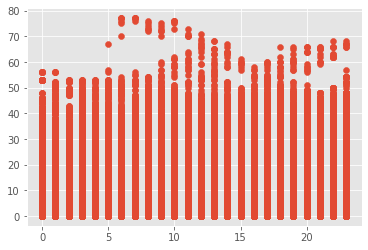

In [26]:
plt.scatter(bike_df['hour'],bike_df['bikes_available'])

In [27]:
km = KMeans(n_clusters = 24 )
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=24, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
y_predicted = km.fit_predict(bike_df[['hour','bikes_available']])
y_predicted
np.unique(y_predicted)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [29]:
bike_df['cluster'] = y_predicted
bike_df.head()

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour,cluster
0,72,20,0,35,0,2020-08-04 23:13:12,32,4,1,23,2
1,79,23,1,9,0,2020-08-04 23:13:25,32,4,1,23,2
2,82,22,3,2,0,2020-08-04 22:32:07,32,4,1,22,2
3,83,44,0,18,0,2020-08-04 23:47:05,32,4,1,23,13
4,116,23,0,27,0,2020-08-04 22:54:06,32,4,1,22,2


No handles with labels found to put in legend.


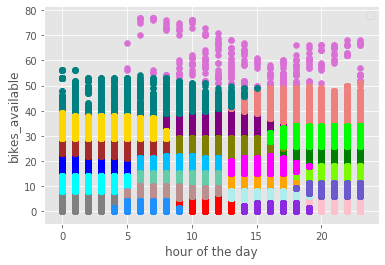

In [30]:
cluster_1 = bike_df[bike_df.cluster == 0]
cluster_2 = bike_df[bike_df.cluster == 1]
cluster_3 = bike_df[bike_df.cluster == 2]
cluster_4 = bike_df[bike_df.cluster == 3]
cluster_5 = bike_df[bike_df.cluster == 4]
cluster_6 = bike_df[bike_df.cluster == 5]
cluster_7 = bike_df[bike_df.cluster == 6]
cluster_8 = bike_df[bike_df.cluster == 7]
cluster_9 = bike_df[bike_df.cluster == 8]
cluster_10 = bike_df[bike_df.cluster == 9]
cluster_11 = bike_df[bike_df.cluster == 10]
cluster_12 = bike_df[bike_df.cluster == 11]
cluster_13 = bike_df[bike_df.cluster == 12]
cluster_14 = bike_df[bike_df.cluster == 13]
cluster_15 = bike_df[bike_df.cluster == 14]
cluster_16 = bike_df[bike_df.cluster == 15]
cluster_17 = bike_df[bike_df.cluster == 16]
cluster_18 = bike_df[bike_df.cluster == 17]
cluster_19 = bike_df[bike_df.cluster == 18]
cluster_20 = bike_df[bike_df.cluster == 19]
cluster_21 = bike_df[bike_df.cluster == 20]
cluster_22 = bike_df[bike_df.cluster == 21]
cluster_23 = bike_df[bike_df.cluster == 22]
cluster_24 = bike_df[bike_df.cluster == 23]


plt.scatter(cluster_1.hour,cluster_1['bikes_available'],color = 'blue')
plt.scatter(cluster_2.hour,cluster_2['bikes_available'],color = 'orange')
plt.scatter(cluster_3.hour,cluster_3['bikes_available'],color = 'green')
plt.scatter(cluster_4.hour,cluster_4['bikes_available'],color = 'red')
plt.scatter(cluster_5.hour,cluster_5['bikes_available'],color = 'purple')
plt.scatter(cluster_6.hour,cluster_6['bikes_available'],color = 'brown')
plt.scatter(cluster_7.hour,cluster_7['bikes_available'],color = 'pink')
plt.scatter(cluster_8.hour,cluster_8['bikes_available'],color = 'gray')
plt.scatter(cluster_9.hour,cluster_9['bikes_available'],color = 'olive')
plt.scatter(cluster_10.hour,cluster_10['bikes_available'],color = 'cyan')
plt.scatter(cluster_11.hour,cluster_11['bikes_available'],color = 'orchid')
plt.scatter(cluster_12.hour,cluster_12['bikes_available'],color = 'deepskyblue')
plt.scatter(cluster_13.hour,cluster_13['bikes_available'],color = 'lawngreen')
plt.scatter(cluster_14.hour,cluster_14['bikes_available'],color = 'lightcoral')
plt.scatter(cluster_15.hour,cluster_15['bikes_available'],color = 'paleturquoise')
plt.scatter(cluster_16.hour,cluster_16['bikes_available'],color = 'blueviolet')
plt.scatter(cluster_17.hour,cluster_17['bikes_available'],color = 'mediumaquamarine')
plt.scatter(cluster_18.hour,cluster_18['bikes_available'],color = 'slateblue')
plt.scatter(cluster_19.hour,cluster_19['bikes_available'],color = 'fuchsia')
plt.scatter(cluster_20.hour,cluster_20['bikes_available'],color = 'teal')
plt.scatter(cluster_21.hour,cluster_21['bikes_available'],color = 'gold')
plt.scatter(cluster_22.hour,cluster_22['bikes_available'],color = 'rosybrown')
plt.scatter(cluster_23.hour,cluster_23['bikes_available'],color = 'dodgerblue')
plt.scatter(cluster_24.hour,cluster_24['bikes_available'],color = 'lime')

plt.xlabel('hour of the day')
plt.ylabel('bikes_available')
plt.legend()



In [31]:
from sklearn.preprocessing import MinMaxScaler



In [32]:
scaler = MinMaxScaler()
scaler.fit(bike_df[['bikes_available']])
bike_df['bikes_available'] = scaler.transform(bike_df[['bikes_available']])


scaler.fit(bike_df[['hour']])
bike_df['hour'] = scaler.transform(bike_df[['hour']])
bike_df
                   

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour,cluster
0,72,0.259740,0,35,0,2020-08-04 23:13:12,32,4,1,1.000000,2
1,79,0.298701,1,9,0,2020-08-04 23:13:25,32,4,1,1.000000,2
2,82,0.285714,3,2,0,2020-08-04 22:32:07,32,4,1,0.956522,2
3,83,0.571429,0,18,0,2020-08-04 23:47:05,32,4,1,1.000000,13
4,116,0.298701,0,27,0,2020-08-04 22:54:06,32,4,1,0.956522,2
...,...,...,...,...,...,...,...,...,...,...,...
151637,4054,0.025974,0,17,0,2020-08-05 17:37:59,32,5,2,0.739130,15
151638,4058,0.012987,0,40,0,2020-08-05 23:36:02,32,5,2,1.000000,6
151639,4064,0.155844,0,11,0,2020-08-05 15:13:55,32,5,2,0.652174,1
151640,4072,0.000000,2,42,0,2020-08-05 16:47:01,32,5,2,0.695652,15


In [33]:
km = KMeans(n_clusters = 24)
y_predicted = km.fit_predict(bike_df[['hour','bikes_available']])
y_predicted

array([21, 13, 13, ..., 10, 16, 16])

In [34]:
bike_df['cluster'] = y_predicted
bike_df

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour,cluster
0,72,0.259740,0,35,0,2020-08-04 23:13:12,32,4,1,1.000000,21
1,79,0.298701,1,9,0,2020-08-04 23:13:25,32,4,1,1.000000,13
2,82,0.285714,3,2,0,2020-08-04 22:32:07,32,4,1,0.956522,13
3,83,0.571429,0,18,0,2020-08-04 23:47:05,32,4,1,1.000000,6
4,116,0.298701,0,27,0,2020-08-04 22:54:06,32,4,1,0.956522,13
...,...,...,...,...,...,...,...,...,...,...,...
151637,4054,0.025974,0,17,0,2020-08-05 17:37:59,32,5,2,0.739130,16
151638,4058,0.012987,0,40,0,2020-08-05 23:36:02,32,5,2,1.000000,2
151639,4064,0.155844,0,11,0,2020-08-05 15:13:55,32,5,2,0.652174,10
151640,4072,0.000000,2,42,0,2020-08-05 16:47:01,32,5,2,0.695652,16


In [35]:
km.cluster_centers_

array([[0.15939772, 0.25765708],
       [0.61161058, 0.04966681],
       [0.9809128 , 0.0597279 ],
       [0.30315854, 0.04733155],
       [0.54881214, 0.20560424],
       [0.81631811, 0.26868733],
       [0.91559394, 0.52380552],
       [0.17727286, 0.06015185],
       [0.30681141, 0.35799734],
       [0.03458098, 0.05640438],
       [0.69549233, 0.19478729],
       [0.45820551, 0.05327661],
       [0.87331931, 0.04889228],
       [0.95279349, 0.33252725],
       [0.08184491, 0.44154962],
       [0.71420729, 0.40003207],
       [0.7352691 , 0.03499718],
       [0.02318295, 0.21638204],
       [0.25754656, 0.18739255],
       [0.82472745, 0.14501387],
       [0.43546808, 0.58492258],
       [0.95563387, 0.19246907],
       [0.51082804, 0.35329761],
       [0.39152962, 0.20177963]])

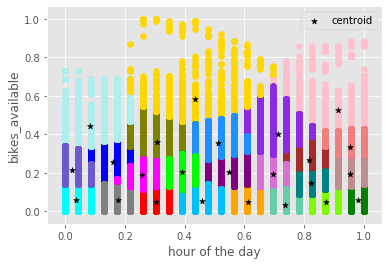

In [36]:
cluster_1 = bike_df[bike_df.cluster == 0]
cluster_2 = bike_df[bike_df.cluster == 1]
cluster_3 = bike_df[bike_df.cluster == 2]
cluster_4 = bike_df[bike_df.cluster == 3]
cluster_5 = bike_df[bike_df.cluster == 4]
cluster_6 = bike_df[bike_df.cluster == 5]
cluster_7 = bike_df[bike_df.cluster == 6]
cluster_8 = bike_df[bike_df.cluster == 7]
cluster_9 = bike_df[bike_df.cluster == 8]
cluster_10 = bike_df[bike_df.cluster == 9]
cluster_11 = bike_df[bike_df.cluster == 10]
cluster_12 = bike_df[bike_df.cluster == 11]
cluster_13 = bike_df[bike_df.cluster == 12]
cluster_14 = bike_df[bike_df.cluster == 13]
cluster_15 = bike_df[bike_df.cluster == 14]
cluster_16 = bike_df[bike_df.cluster == 15]
cluster_17 = bike_df[bike_df.cluster == 16]
cluster_18 = bike_df[bike_df.cluster == 17]
cluster_19 = bike_df[bike_df.cluster == 18]
cluster_20 = bike_df[bike_df.cluster == 19]
cluster_21 = bike_df[bike_df.cluster == 20]
cluster_22 = bike_df[bike_df.cluster == 21]
cluster_23 = bike_df[bike_df.cluster == 22]
cluster_24 = bike_df[bike_df.cluster == 23]


plt.scatter(cluster_1.hour,cluster_1['bikes_available'],color = 'blue')
plt.scatter(cluster_2.hour,cluster_2['bikes_available'],color = 'orange')
plt.scatter(cluster_3.hour,cluster_3['bikes_available'],color = 'green')
plt.scatter(cluster_4.hour,cluster_4['bikes_available'],color = 'red')
plt.scatter(cluster_5.hour,cluster_5['bikes_available'],color = 'purple')
plt.scatter(cluster_6.hour,cluster_6['bikes_available'],color = 'brown')
plt.scatter(cluster_7.hour,cluster_7['bikes_available'],color = 'pink')
plt.scatter(cluster_8.hour,cluster_8['bikes_available'],color = 'gray')
plt.scatter(cluster_9.hour,cluster_9['bikes_available'],color = 'olive')
plt.scatter(cluster_10.hour,cluster_10['bikes_available'],color = 'cyan')
plt.scatter(cluster_11.hour,cluster_11['bikes_available'],color = 'orchid')
plt.scatter(cluster_12.hour,cluster_12['bikes_available'],color = 'deepskyblue')
plt.scatter(cluster_13.hour,cluster_13['bikes_available'],color = 'lawngreen')
plt.scatter(cluster_14.hour,cluster_14['bikes_available'],color = 'lightcoral')
plt.scatter(cluster_15.hour,cluster_15['bikes_available'],color = 'paleturquoise')
plt.scatter(cluster_16.hour,cluster_16['bikes_available'],color = 'blueviolet')
plt.scatter(cluster_17.hour,cluster_17['bikes_available'],color = 'mediumaquamarine')
plt.scatter(cluster_18.hour,cluster_18['bikes_available'],color = 'slateblue')
plt.scatter(cluster_19.hour,cluster_19['bikes_available'],color = 'fuchsia')
plt.scatter(cluster_20.hour,cluster_20['bikes_available'],color = 'teal')
plt.scatter(cluster_21.hour,cluster_21['bikes_available'],color = 'gold')
plt.scatter(cluster_22.hour,cluster_22['bikes_available'],color = 'rosybrown')
plt.scatter(cluster_23.hour,cluster_23['bikes_available'],color = 'dodgerblue')
plt.scatter(cluster_24.hour,cluster_24['bikes_available'],color = 'lime')

plt.xlabel('hour of the day')
plt.ylabel('bikes_available')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker = '*',label = 'centroid')
plt.legend()

In [37]:
k_range = range (1,24)
SSE = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(bike_df[['hour','bikes_available']])
    SSE.append(km.inertia_)

In [38]:
SSE

[16444.799786471172,
 6152.134465699445,
 4350.008640634265,
 3528.7954670303347,
 2854.0973629623268,
 2338.586908055472,
 1964.0920472936448,
 1731.22800144502,
 1540.828860346261,
 1405.0764109175473,
 1282.1183095558715,
 1155.9722275831255,
 1054.2878033651323,
 987.5236361308794,
 920.2841519317219,
 862.2711121151066,
 812.0101326615273,
 770.8671330163457,
 729.1673206069876,
 684.8365211697552,
 649.6493990218111,
 621.2198390193263,
 598.7489746162667]

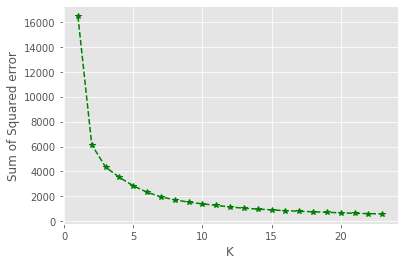

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

plt.plot(k_range,SSE, linestyle='--', marker='*', color='green')

## Linear Regression

In [ ]:
bike_df = lsd.drop(['time_reported'],axis =1 )


In [5]:
def get_week(dt):
    return dt.week
bike_df['week'] = bike_df['date_n_time'].map(get_week)

def get_dom(dt):
    return dt.day
bike_df['dom'] = bike_df['date_n_time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()

bike_df['weekday'] = bike_df['date_n_time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

bike_df['hour'] = bike_df['date_n_time'].map(get_hour)

In [6]:
bike_df

,station_id,bikes_available,bikes_disabled,docks_available,docks_disabled,date_n_time,week,dom,weekday,hour
0,72,20,0,35,0,2020-08-04 23:13:12,32,4,1,23
1,79,23,1,9,0,2020-08-04 23:13:25,32,4,1,23
2,82,22,3,2,0,2020-08-04 22:32:07,32,4,1,22
3,83,44,0,18,0,2020-08-04 23:47:05,32,4,1,23
4,116,23,0,27,0,2020-08-04 22:54:06,32,4,1,22
...,...,...,...,...,...,...,...,...,...,...
151637,4054,2,0,17,0,2020-08-05 17:37:59,32,5,2,17
151638,4058,1,0,40,0,2020-08-05 23:36:02,32,5,2,23
151639,4064,12,0,11,0,2020-08-05 15:13:55,32,5,2,15
151640,4072,0,2,42,0,2020-08-05 16:47:01,32,5,2,16


Text(0, 0.5, 'Bikes_Available')

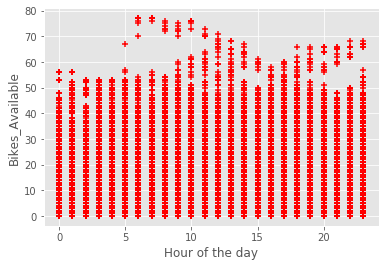

In [7]:
plt.scatter(bike_df.hour,bike_df.bikes_available,color = 'red',marker = '+')
plt.xlabel('Hour of the day')
plt.ylabel('Bikes_Available')

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(bike_df[['hour','weekday','dom']],bike_df.bikes_available)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.predict([[22,1,4]])

array([15.26311672])

In [10]:
reg.coef_

array([-0.05345773, -3.63413126,  0.46890408])

In [11]:
reg.intercept_

18.197701743499206

In [12]:
-0.05345773*22 + -3.63413126 * 1 +  0.46890408 * 4 + 18.197701743499206

15.263116743499205

In [13]:
#hours = bike_df.hour.unique()
#hours_list = hours.tolist()
#hours_list
data_to_predict = bike_df[['hour','weekday','dom']]
data_to_predict.head()


,hour,weekday,dom
0,23,1,4
1,23,1,4
2,22,1,4
3,23,1,4
4,22,1,4


In [15]:
bikes_ready = reg.predict(data_to_predict)
predicted_bikes = bikes_ready.tolist()


In [16]:
data_to_predict['predicted_bikes'] = predicted_bikes
data_to_predict

,hour,weekday,dom,predicted_bikes
0,23,1,4,15.209659
1,23,1,4,15.209659
2,22,1,4,15.263117
3,23,1,4,15.209659
4,22,1,4,15.263117
...,...,...,...,...
151637,17,2,5,12.365178
151638,23,2,5,12.044432
151639,15,2,5,12.472094
151640,16,2,5,12.418636


In [17]:
data_to_predict.to_csv("predictedbikes.csv",index = False)

ValueError: shapes (151642,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

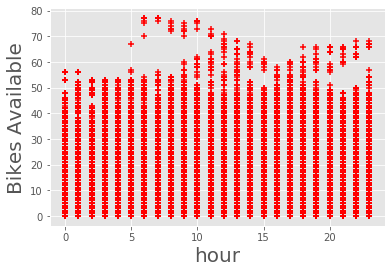

In [19]:
plt.xlabel('hour', fontsize = 20)
plt.ylabel('Bikes Available',fontsize = 20)
plt.scatter(bike_df.hour,bike_df.bikes_available,color = 'red',marker = '+')
plt.plot(bike_df.hour,reg.predict(bike_df[['hour']]), color = 'blue')